# Cluster Analysis

This is an improved version of `cluster-analysis.py`, which can be found in the `src` folder. It uses a newer function which separates clusters while keeping boundary periodicity. This is part of the revision process going over a few basic steps of the project.

### Import Libraries

In [2]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cmcrameri #for different cmaps
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import sys
sys.path.append('./..')
from src.utils import get_cluster_labels,get_ds_iters
#from src.plot_utils import get_plot_configs
from src.training_utils import extract_floats


2024-04-11 12:40:58.351512: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-11 12:40:59.880218: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 12:41:01.535476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Set Analysis Conditions

In [3]:
Pt=0.034 #tumble probability
rho=0.3 #particle density
file = ("../data/no-rolling/dataset_tumble_{}_density_{}.h5".format(Pt,rho)) #change this to analyse different file

cmap1 = plt.get_cmap(name="cmc.lajolla") #cmap for first picture
cmap2 = plt.get_cmap(name="cmc.tokyoS") #cmap for second picture

### Run Analysis and Plot

1 414


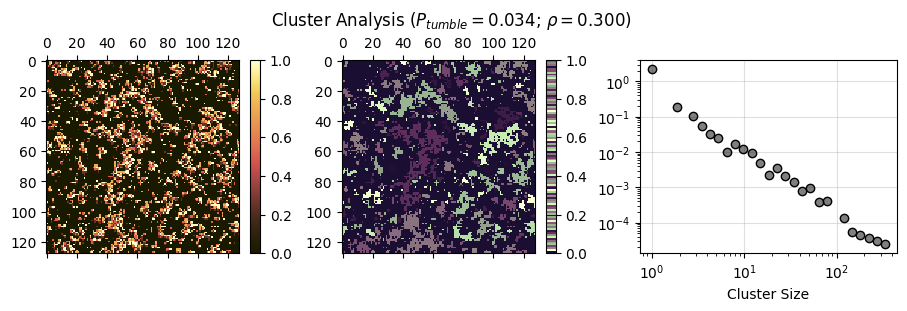

In [4]:
hfile = h5py.File(file,"r")

fig, (regplot, clusterplot, clusterhistogram) = plt.subplots (1,3,figsize=(9,3),width_ratios=(1,1,1.3),constrained_layout=True)

iters = get_ds_iters(hfile.keys())
fig.suptitle(r"Cluster Analysis ($P_{tumble}=%.3f$; $\rho=%.3f$)" % (Pt,rho))

#plot regular graph
image = hfile[f"conf_{iters[-1]}"]
regplot.matshow(image,cmap=cmap1)

#plot cluster separation graph
kernel = [[0,1,0],
          [1,1,1],
          [0,1,0]]
labelled, _ = ndimage.label(image,structure=kernel)

# periodicity establishment
for y in range(labelled.shape[0]):
    if labelled[y, 0] > 0 and labelled[y, -1] > 0:
        labelled[labelled == labelled[y, -1]] = labelled[y, 0]
for y in range(labelled.shape[1]):
    if labelled[y, 0] > 0 and labelled[y, -1] > 0:
        labelled[labelled == labelled[y, -1]] = labelled[y, 0]

clusterplot.matshow(labelled,cmap=cmap2)

#plot histogram of obtained clusters
cluster_sizes = np.bincount(labelled.flatten())[1:]
cluster_sizes = np.delete(cluster_sizes,np.where(cluster_sizes==0))
print(cluster_sizes.min(),cluster_sizes.max())
bin_edges = np.logspace(np.log2(cluster_sizes.min()), np.log2(cluster_sizes.max()), 30, base=2)
#bin_edges = np.linspace(cluster_sizes.min(),cluster_sizes.max(),100)
counts, _ = np.histogram(cluster_sizes,bins=bin_edges,density=True)
clusterhistogram.grid(alpha=.4)
clusterhistogram.set_axisbelow(True)
clusterhistogram.scatter(bin_edges[:-1],counts,edgecolor=(0,0,0,1),facecolor=(0,0,0,.5))
clusterhistogram.set_yscale("log"), clusterhistogram.set_xscale("log")
clusterhistogram.set_xlabel("Cluster Size")

fig.colorbar(plt.cm.ScalarMappable(cmap=cmap1),ax=regplot)
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap2),ax=clusterplot)
plt.show()

### Array of Cluster Analysis

1 132
1 224
1 593
1 70
1 165
1 434
1 42
1 104
1 254
1 20
1 51
1 115
1 9
1 37
1 82


/tmp/ipykernel_7618/475512023.py:56: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axis.set_xlim((cluster_sizes.min()-20, cluster_sizes.max()+5))
/tmp/ipykernel_7618/475512023.py:57: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim((-20, 200))


Text(0.5, 0.01, 'Density, $\\rho$')

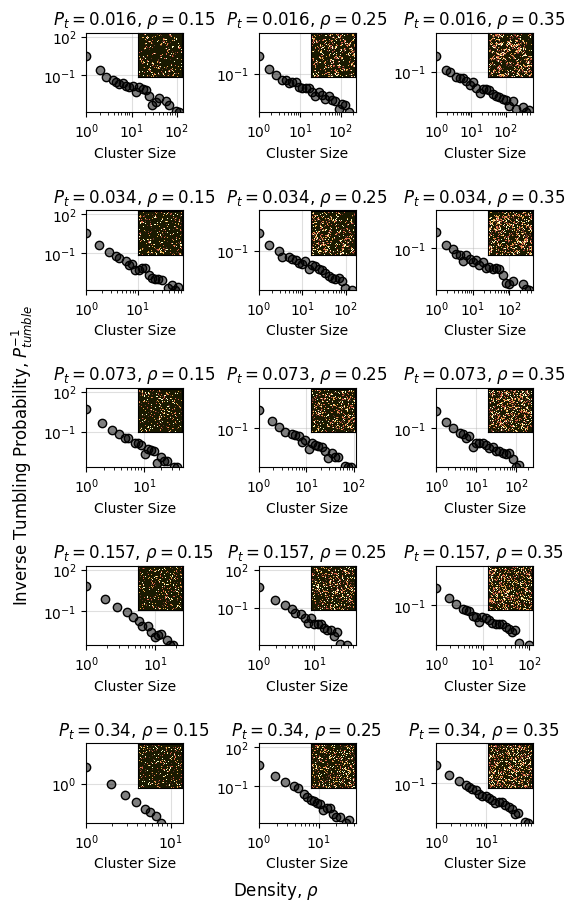

In [9]:
#plot_configs = get_plot_configs()
#plot_configs["xtick.labelsize"] = 8
#plot_configs["ytick.labelsize"] = 8
#plt.rcParams.update(plot_configs)
fig = plt.figure(figsize=(9 * 3 / 5, 9), constrained_layout=True)
gspec = fig.add_gridspec(5, 3, wspace=0.15, hspace=0.15)
cmap = "cmc.lajolla"
tumbles = [0.016,0.034,0.073,0.157,0.340]
densities = [0.15,0.25,0.35]
files = []

for tumble in tumbles:
    for density in densities:
        files.append(f"../data/no-rolling/dataset_tumble_{tumble:.3f}_density_{density}.h5")

ctr = 0
for idx in range(5):
    for jdx in range(3):
        axis = fig.add_subplot(gspec[idx, jdx], autoscale_on=False)
        inaxis = inset_axes(axis,width="100%",height="100%",loc="upper right",bbox_to_anchor=(0.56,0.53,.55,.55),bbox_transform=axis.transAxes)

        with h5py.File(files[ctr], "r") as fin:
            key_list = list(fin.keys())
            iter_n = get_ds_iters(key_list)
            img = fin[f"conf_{iter_n[-2]}"]
            
            kernel = [[0,1,0],
                      [1,1,1],
                      [0,1,0]]
            labelled, _ = ndimage.label(img,structure=kernel)

            for y in range(labelled.shape[0]):
                if labelled[y, 0] > 0 and labelled[y, -1] > 0:
                    labelled[labelled == labelled[y, -1]] = labelled[y, 0]
            for y in range(labelled.shape[1]):
                if labelled[y, 0] > 0 and labelled[y, -1] > 0:
                    labelled[labelled == labelled[y, -1]] = labelled[y, 0]
            
            cluster_sizes = np.bincount(labelled.flatten())[1:]
            cluster_sizes = np.delete(cluster_sizes,np.where(cluster_sizes==0))
            print(cluster_sizes.min(),cluster_sizes.max())
            bin_edges = np.logspace(np.log2(cluster_sizes.min()), np.log2(cluster_sizes.max()), 30, base=2)
            #bin_edges = np.linspace(cluster_sizes.min(),cluster_sizes.max(),100)
            counts, _ = np.histogram(cluster_sizes,bins=bin_edges,density=True)
            axis.grid(alpha=.4)
            axis.set_axisbelow(True)
            axis.scatter(bin_edges[:-1],counts,edgecolor=(0,0,0,1),facecolor=(0,0,0,.5))
            axis.set_yscale("log"), axis.set_xscale("log")
            axis.set_xlabel("Cluster Size")
            
            inaxis.matshow(img, cmap=cmap)
            inaxis.set_xticks([])
            inaxis.set_yticks([])

            axis.set_xlim((cluster_sizes.min()-20, cluster_sizes.max()+5))
            axis.set_ylim((-20, 200))
        axis.set_title(r"$P_{t}=%s$, $ \rho = %s $ " % (tumbles[idx],densities[jdx]))

        ctr += 1
fig.supylabel(r"Inverse Tumbling Probability, $P_{tumble}^{-1}$")
fig.supxlabel(r"Density, $\rho$")